In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

file_path = r"H:\academics\SEM4\ai\project\gitRepo\AquilaOptimiserOptimised\matrixEval_vs_cec\wilcoxon_results_all_pairs.csv"
df = pd.read_csv(file_path)
df["p-value"] = pd.to_numeric(df["p-value"], errors="coerce")


Does my optimizer perform significantly differently on F12014 vs F22014

C:\Users\HARSHDIP\AppData\Local\Temp\ipykernel_18348\3442152759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="IsSignificant", palette="pastel")


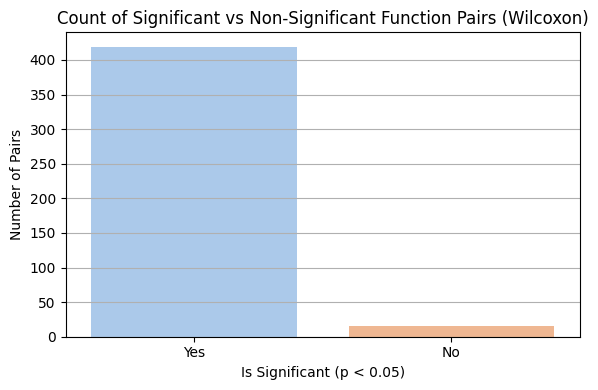

In [3]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="IsSignificant", palette="pastel")
plt.title("Count of Significant vs Non-Significant Function Pairs (Wilcoxon)")
plt.ylabel("Number of Pairs")
plt.xlabel("Is Significant (p < 0.05)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\HARSHDIP\AppData\Local\Temp\ipykernel_18348\793609163.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df.dropna(), x="IsSignificant", y="p-value", palette="Set2")


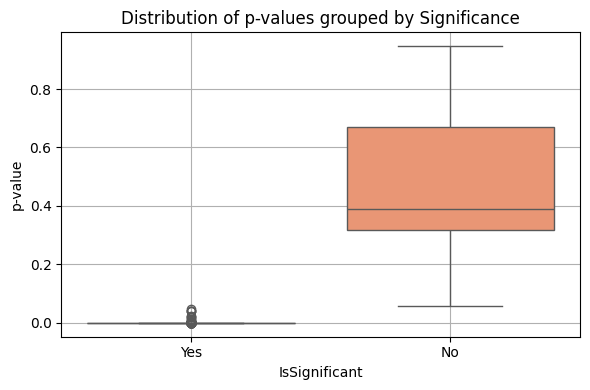

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df.dropna(), x="IsSignificant", y="p-value", palette="Set2")
plt.title("Distribution of p-values grouped by Significance")
plt.grid(True)
plt.tight_layout()
plt.show()

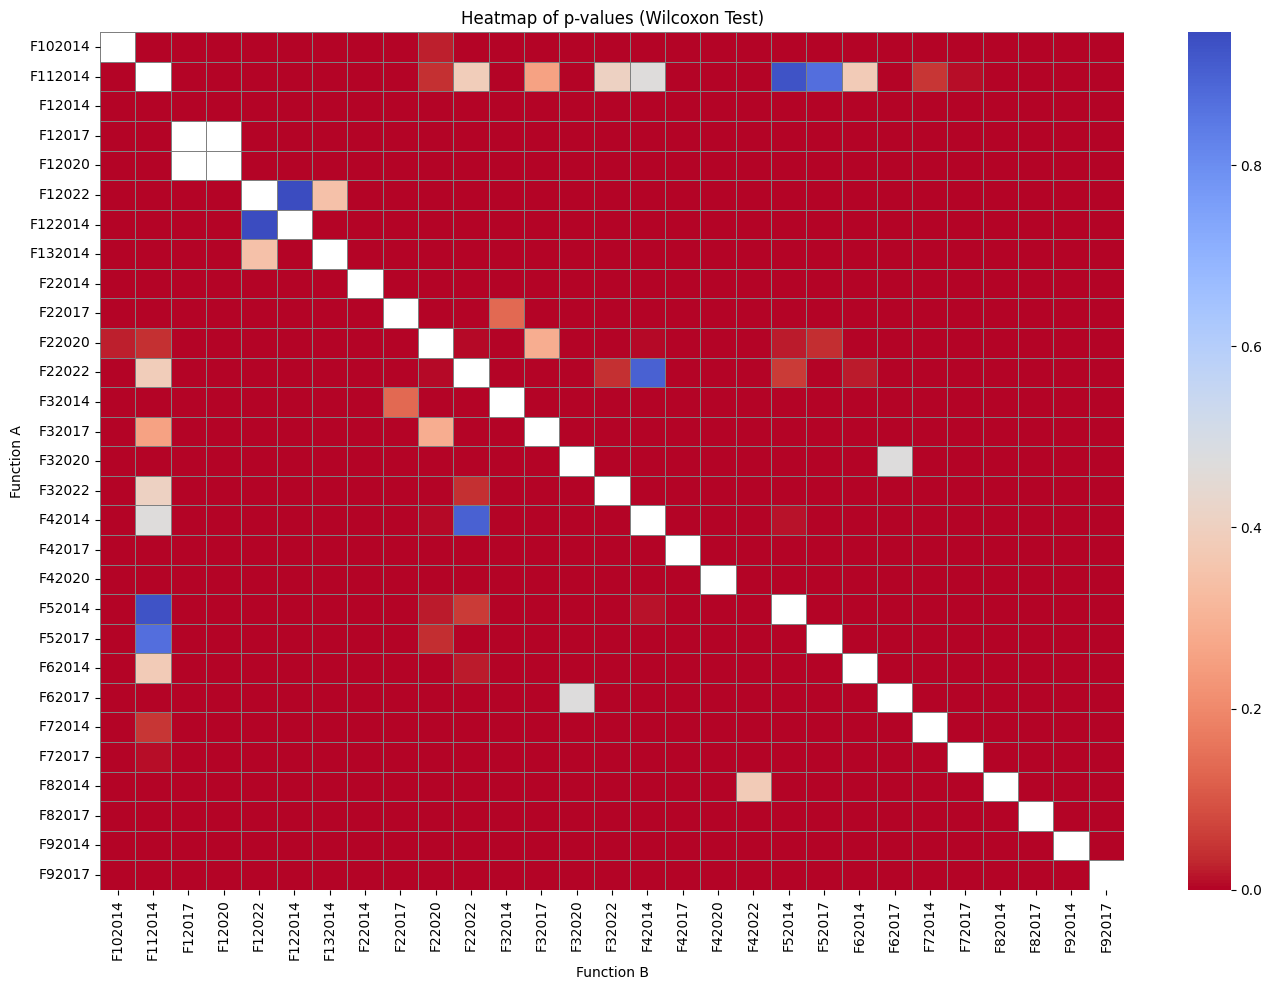

In [5]:
pivot_df = df.pivot(index="Function A", columns="Function B", values="p-value")

# Expand it to symmetric matrix for better visualization
pivot_df_full = pivot_df.copy()
for i in pivot_df.columns:
    for j in pivot_df.index:
        if pd.isna(pivot_df_full.loc[j, i]):
            try:
                pivot_df_full.loc[j, i] = pivot_df.loc[i, j]
            except:
                pass

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_df_full, annot=False, cmap="coolwarm_r", linewidths=0.5, linecolor='gray')
plt.title("Heatmap of p-values (Wilcoxon Test)")
plt.tight_layout()
plt.show()


Network graph: which functions are tightly connected via statistical significance.

Edge Color	Likely Meaning
Yellow	p < 0.05 → Significant difference
Green	p ≈ 0.05 → Marginal significance
Purple	p > 0.05 → No significant difference

C:\Users\HARSHDIP\AppData\Local\Temp\ipykernel_18348\3166139172.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


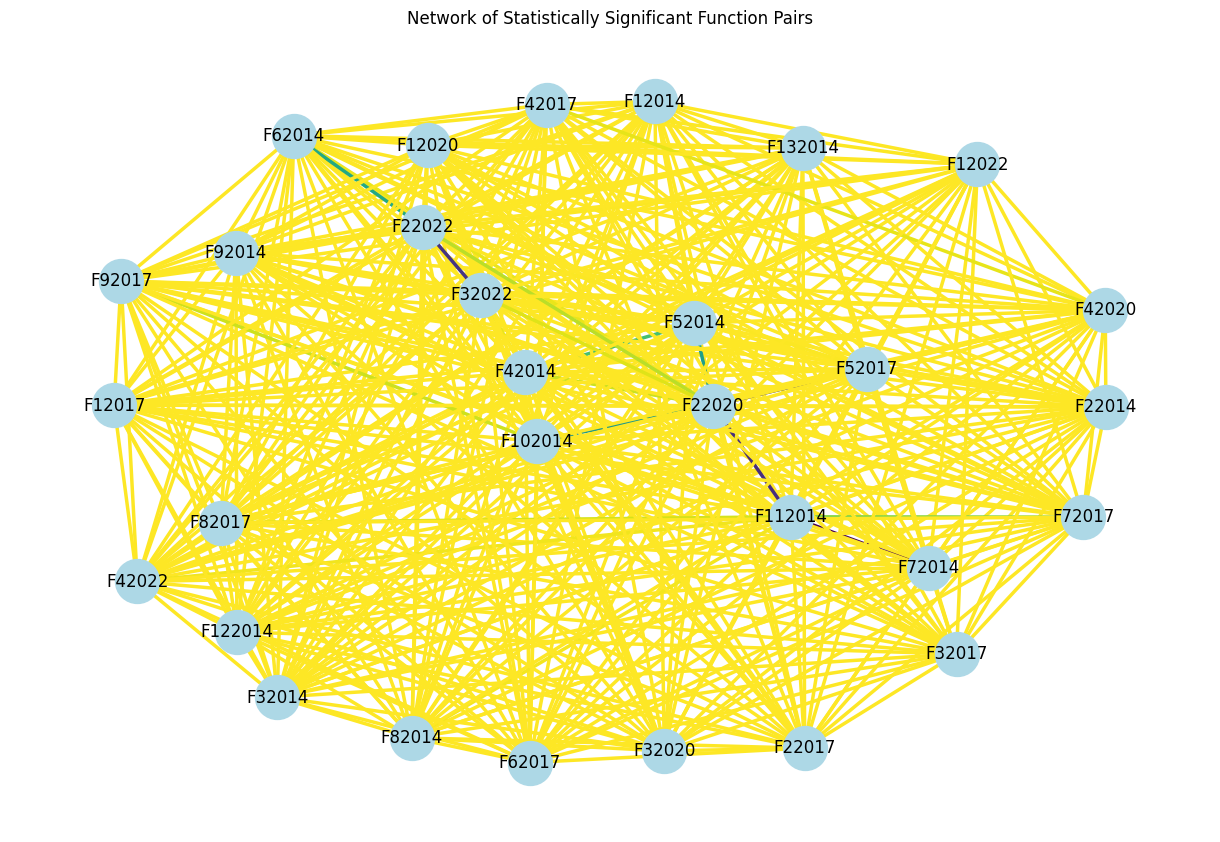

In [6]:
G = nx.Graph()
for _, row in df.iterrows():
    if row["IsSignificant"] == "Yes":
        G.add_edge(row["Function A"], row["Function B"], weight=row["p-value"])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
edges = G.edges()
weights = [1 - G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color=weights,
        width=2.5, edge_cmap=plt.cm.viridis, node_size=1000)
plt.title("Network of Statistically Significant Function Pairs")
plt.tight_layout()
plt.show()

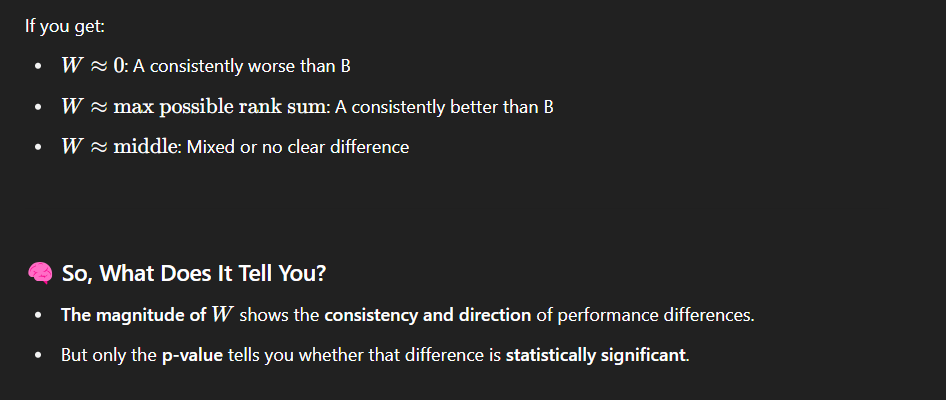

W is the column statistic in csv file

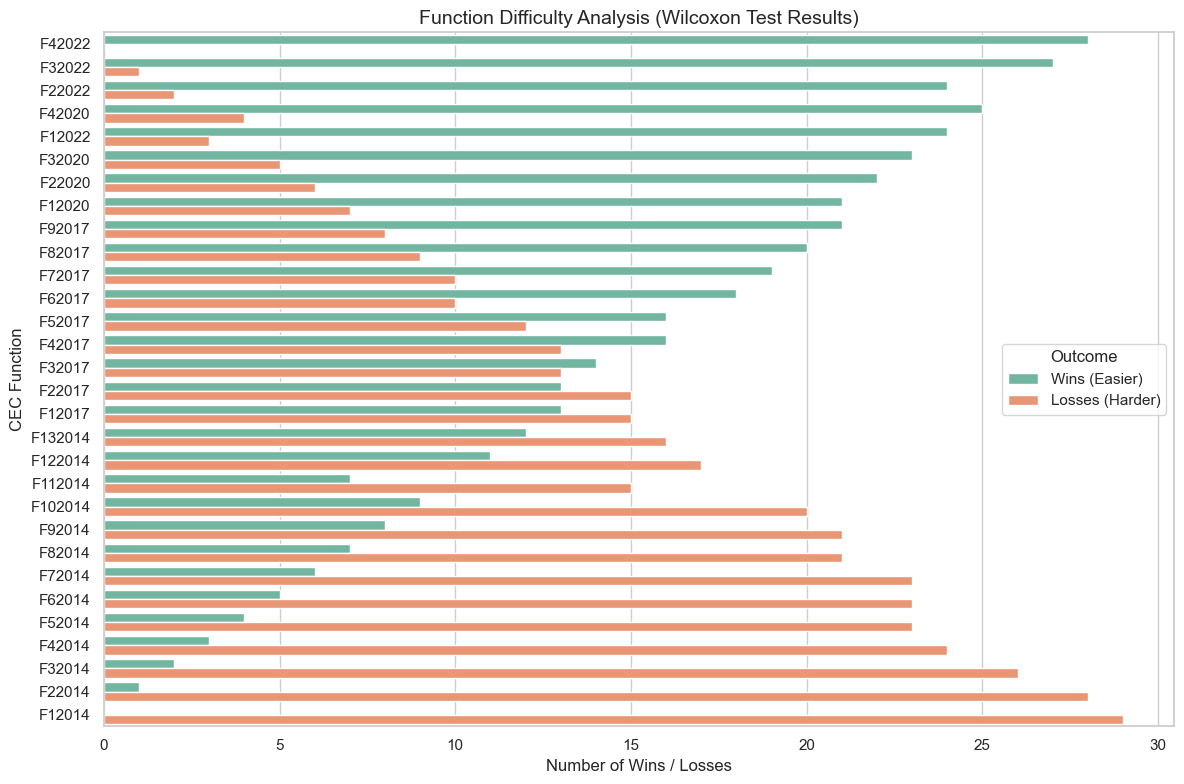

,Function,Wins (Easier),Losses (Harder),Net Score
0,F42022,28,0,28
1,F32022,27,1,26
2,F22022,24,2,22
3,F42020,25,4,21
4,F12022,24,3,21
5,F32020,23,5,18
6,F22020,22,6,16
7,F12020,21,7,14
8,F92017,21,8,13
9,F82017,20,9,11


In [ ]:
significant_df = df[df['p-value'] < 0.05]

win_count = significant_df['Function B'].value_counts()
loss_count = significant_df['Function A'].value_counts()

summary_df = pd.DataFrame({
    "Wins (Easier)": win_count,
    "Losses (Harder)": loss_count
}).fillna(0).astype(int)

summary_df["Net Score"] = summary_df["Wins (Easier)"] - summary_df["Losses (Harder)"]
summary_df = summary_df.sort_values(by="Net Score", ascending=False)
summary_df = summary_df.reset_index().rename(columns={"index": "Function"})

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

melted = summary_df.melt(id_vars='Function', value_vars=["Wins (Easier)", "Losses (Harder)"],
                         var_name="Outcome", value_name="Count")

sns.barplot(data=melted, x="Count", y="Function", hue="Outcome", palette="Set2")
plt.title("Function Difficulty Analysis (Wilcoxon Test Results)", fontsize=14)
plt.xlabel("Number of Wins / Losses")
plt.ylabel("CEC Function")
plt.legend(title="Outcome")
plt.tight_layout()
plt.show()

from IPython.display import display
display(summary_df.style.background_gradient(cmap='RdYlGn'))
